# PyTorch Basics for Deep Learning

## Introduction to PyTorch
PyTorch is an open-source deep learning library developed by Facebook's AI Research lab. It allows us to implement and train neural networks that can be deployed in multiple deep learning applications.


## Importing PyTorch

In [1]:
import torch
import torch.nn as nn # For neural networks
import torch.optim as optim # For optimizers
import torch.nn.functional as F # For activation functions
from torch.utils.data import DataLoader, TensorDataset # For dataset preparation


## Tensors in PyTorch
Tensors are the fundamental building blocks of PyTorch. They are similar to NumPy arrays but can be used on GPUs for acceleration.

In [2]:
# Creating a tensor
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print(x)

# Tensor with random values
x_random = torch.rand(2, 2)
print(x_random)

# Checking the shape and type of a tensor
print(x.shape, x.dtype)


tensor([[1., 2.],
        [3., 4.]])
tensor([[0.2781, 0.3864],
        [0.2432, 0.1425]])
torch.Size([2, 2]) torch.float32


## Autograd: Automatic Differentiation
PyTorch's autograd module automatically calculates gradients for backpropagation. It keeps track of operations on tensors to compute derivatives.

In [11]:
# Create a tensor with requires_grad=True to track computations
x = torch.tensor([[2.0, 3.0]], requires_grad=True) # Input

# Perform some operations
y = 3 * x ** 2 + 2 # Output of shape (1,2)

# Compute the sum and call backward to compute gradients
z = y.sum() # Function of the output (function is a scalar)
z.backward() # Backpropagation

print(z.dtype, type(z))

# Check the gradients
print(x.grad)


torch.float32 <class 'torch.Tensor'>
tensor([[12., 18.]])


# Building a Simple Neural Network
PyTorch offers two ways to define models: using the sequential API or by using the ```nn.Module``` subclass.

Using ```nn.Sequential```:

In [12]:
model = nn.Sequential(
    nn.Linear(2, 4), # Fully connected layer with 2 input nodes and 4 output nodes
    nn.ReLU(), # Activation function (passes the output if it is positive)
    nn.Linear(4, 1) # 4 input nodes and 1 output node (final output)
)

# Sample input tensor
sample_input = torch.rand((1, 2))
output = model(sample_input)
print(output)


tensor([[-0.0508]], grad_fn=<AddmmBackward0>)


Custom Model using ```nn.Module```:

In [13]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x)) # output of layer 1
        x = self.fc2(x) # final output
        return x

# Initialize the model
model = SimpleNN()
output = model(sample_input) # Calls forward automatically
print(model)
print(output) # output


SimpleNN(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
)
tensor([[-0.1162]], grad_fn=<AddmmBackward0>)


## 6. Loss Functions and Optimizers
Loss functions and optimizers are essential for training neural networks.

In [ ]:
# Define the Mean Squared Error loss function
loss_fn = nn.MSELoss()

# Define an optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Example forward pass and loss calculation
target = torch.tensor([1.0])  # Example target, ground truth
loss = loss_fn(output, target) # Loss function
print(f"Loss: {loss.item()}")

# Perform backward pass and update weights
optimizer.zero_grad()  # Zero the gradients
loss.backward()  # Backpropagate
optimizer.step()  # Update the parameters


## Training a Simple Model
Let's use the concepts above to train a simple neural network. The first step is to prepare our data. In this simple example, we will not use a dataloader, and instead randomly generate training and validation datasets.

In [ ]:
# Generate some dummy data
inputs = torch.rand((1000, 2)) # input feature vectors each of size (1,2)
targets = torch.rand((1000, 1)) # ground truth

# Split the data into training and validation sets
train_inputs, val_inputs = inputs[:800], inputs[800:] # 80% of the data is for training and 20% for validation
train_targets, val_targets = targets[:800], targets[800:]

# Create datasets and data loaders for training and validation
train_dataset = TensorDataset(train_inputs, train_targets) # train dataset collected
val_dataset = TensorDataset(val_inputs, val_targets)

train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True) # Here, we can define the batch size and other parameters
val_dataloader = DataLoader(val_dataset, batch_size=10, shuffle=False)

Now that we have prepared some dummy datasets, let's train the neural network that we previously defined as ```SimpleNN```.

Epoch 1, Training Loss: 0.16636236011981964, Validation Loss: 0.2891
Epoch 2, Training Loss: 0.30045515298843384, Validation Loss: 0.2811
Epoch 3, Training Loss: 0.2729916572570801, Validation Loss: 0.2735
Epoch 4, Training Loss: 0.19974730908870697, Validation Loss: 0.2662
Epoch 5, Training Loss: 0.21829047799110413, Validation Loss: 0.2592
Epoch 6, Training Loss: 0.2131294310092926, Validation Loss: 0.2526
Epoch 7, Training Loss: 0.29778289794921875, Validation Loss: 0.2461
Epoch 8, Training Loss: 0.1894802749156952, Validation Loss: 0.2400
Epoch 9, Training Loss: 0.2415497750043869, Validation Loss: 0.2341
Epoch 10, Training Loss: 0.2713540494441986, Validation Loss: 0.2285
Epoch 11, Training Loss: 0.2614954710006714, Validation Loss: 0.2230
Epoch 12, Training Loss: 0.24509651958942413, Validation Loss: 0.2179
Epoch 13, Training Loss: 0.15017668902873993, Validation Loss: 0.2129
Epoch 14, Training Loss: 0.24572673439979553, Validation Loss: 0.2081
Epoch 15, Training Loss: 0.18350875

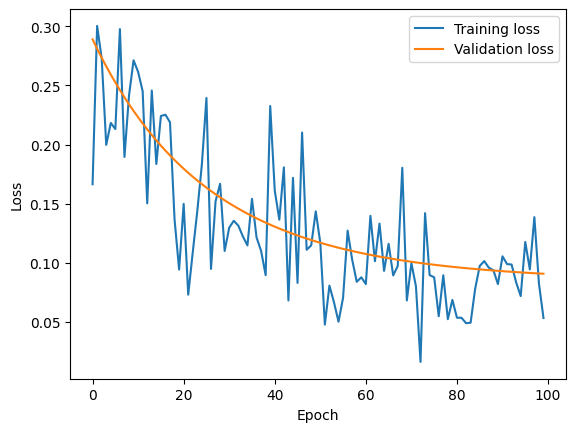

In [ ]:
from matplotlib import pyplot # To plot our training and validation losses

train_losses = []
val_losses = []

# Training loop with validation
for epoch in range(100):
    model.train()  # Set the model to training mode

    # Training phase
    for batch_inputs, batch_targets in train_dataloader:
        # Forward pass
        predictions = model(batch_inputs) # output for the input batch
        loss = loss_fn(predictions, batch_targets)

        # Backward pass and optimization (happens every iteration)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation phase happens at the end of every epoch
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # No need to compute gradients during validation
        for val_inputs, val_targets in val_dataloader:
            val_predictions = model(val_inputs)
            val_loss += loss_fn(val_predictions, val_targets).item()

    val_loss /= len(val_dataloader)  # Average validation loss

    print(f"Epoch {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss:.4f}")
    train_losses.append(loss.item())
    val_losses.append(val_loss)

# Plotting the losses
pyplot.plot(list(range(100)), train_losses)
pyplot.plot(list(range(100)), val_losses)
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend(['Training loss', 'Validation loss'])

## Moving to GPU
If you have access to a GPU, you can move tensors and models to the GPU to speed up training.

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model and data to GPU
model.to(device)
print(model)
inputs, targets = inputs.to(device), targets.to(device)

# GPU memory or VRAM should be higher -> you can use a higher batch size


## Example of an Image Dataloader

In [ ]:
# An example of an image dataloader
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

# This inherits from the Dataset subclass
class CustomDataset(Dataset):
    def __init__(self, img_list, labels, transform=transforms.ToTensor()):
        self.img_list = img_list # Input image paths
        self.labels = labels # Corresponding ground truth labels
        self.transform = transform # Preprocessing transform

    def __len__(self):
        return len(self.img_list) # Returns the total number of training samples

    def __getitem__(self, idx):
        x = Image.open(self.img_list[idx]) # Opening the image from its path
        if x.mode != 'RGB':
            x = x.convert('RGB') # Convert the image to RGB if it's not
        x = self.transform(x) # Apply the transform
        label = self.labels[idx] # Get the label for the image
        return x , label

## Summary

We have the following key ingredients for training and testing a neural network using PyTorch:

1. **Data Preparation and Dataloading**: The training data must be arranged into inputs (preprocessed if required) and labels, preferable a list of inputs with their corresponding labels. The Dataset class of PyTorch helps use set parameters such as batch size. If the input data consists of images, then ```scikit-image```, ```PIL``` and ```opencv``` are popular python packages that will allow us to read and save images.

2. **Model Definition**: The next step is to define the neural network and specify the layers contained in the network (fully connected or convolutional layers). This should preferably defined as a python class using the ```nn.Module``` subclass offered by PyTorch.

3. **Optimizer and Loss Functions**: This is the most important part of training. We must choose an optimizer to perform backpropagation in the neural network. The most basic optimizer is the stochastic gradient descent (SGD) algorithm, but there are more advanced optimizers such as Adam, which is the most popular gradient descent algorithm now! The next step is to design a loss function that suits the problem we are trying to solve. For a regression problem (the one shown in this notebook), we may want to use a loss function like ```nn.MSELoss()``` which is the mean squared error loss. For a classification problem, the cross entropy loss ```nn.CrossEntropyLoss()``` would be more useful.  

4. **Training Loop**: Finally, we need to write a training loop that samples a batch of random samples using the dataloader that we defined, and perform backpropagation for this batch of data. Don't forget the three most important lines of code that actually do the training (update the network weights)! We would also like to monitor our training, and for this, we may choose to test our model after some fixed number of epochs on a validation set to decide how many epochs of training are actually required for our application.

## Conclusion

In this notebook, we've introduced the basics of PyTorch, including tensors, autograd, neural networks, and training loops. With these fundamentals, you're now ready to explore deeper into building more complex models using PyTorch. More advanced models include transformers, diffusion models, and many popular generative models such as GANs and VAEs.

Happy training! :)